In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from category_encoders import TargetEncoder
import seaborn as sns

In [2]:
df = pd.read_csv('../datos_1/datos_limpios.csv', index_col=0)

In [3]:
data = df

In [4]:
data

,price,propertyType,size,exterior,rooms,bathrooms,distance,status,floor,hasLift
0,750.0,flat,60.0,True,1,1,7037,good,3,True
1,750.0,flat,70.0,True,2,1,16145,good,bj,False
2,400.0,penthouse,67.0,True,2,2,55041,good,2,False
3,590.0,flat,70.0,True,3,2,56596,good,Desconocido,False
4,684.0,studio,45.0,True,0,1,10656,Desconocido,Desconocido,Desconocido
...,...,...,...,...,...,...,...,...,...,...
348,640.0,flat,69.0,True,2,1,29311,good,2,True
349,700.0,flat,54.0,True,1,1,11656,good,1,True
350,700.0,flat,59.0,True,1,1,7529,good,6,True
351,700.0,flat,75.0,True,2,1,30359,good,1,False


<Axes: xlabel='price', ylabel='size'>

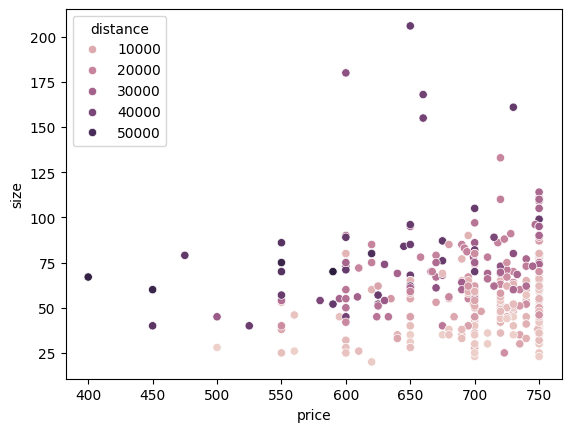

In [5]:
sns.scatterplot(x='price', y='size', hue='distance', data=data)

In [7]:
# Verificar filas que cumplen con la condición
data[(data['price'] < 500) | (data['size'] > 150)]


,price,propertyType,size,exterior,rooms,bathrooms,distance,status,floor,hasLift
2,400.0,penthouse,67.0,True,2,2,55041,good,2,False
18,650.0,chalet,206.0,False,3,1,43195,good,Desconocido,Desconocido
186,450.0,penthouse,60.0,True,1,1,53238,good,Desconocido,False
191,660.0,flat,155.0,False,3,2,41119,Desconocido,Desconocido,Desconocido
195,660.0,flat,168.0,False,4,2,41221,good,3,True
225,730.0,flat,161.0,True,4,1,44159,good,3,False
241,475.0,flat,79.0,True,2,2,45077,good,2,True
248,600.0,chalet,180.0,False,3,2,35543,good,Desconocido,Desconocido
339,450.0,flat,40.0,True,1,1,46273,good,1,False


In [8]:
data = data[~((data['price'] < 500) | (data['size'] > 150))]

In [9]:
data

,price,propertyType,size,exterior,rooms,bathrooms,distance,status,floor,hasLift
0,750.0,flat,60.0,True,1,1,7037,good,3,True
1,750.0,flat,70.0,True,2,1,16145,good,bj,False
3,590.0,flat,70.0,True,3,2,56596,good,Desconocido,False
4,684.0,studio,45.0,True,0,1,10656,Desconocido,Desconocido,Desconocido
5,600.0,flat,73.0,True,2,1,37062,good,3,False
...,...,...,...,...,...,...,...,...,...,...
348,640.0,flat,69.0,True,2,1,29311,good,2,True
349,700.0,flat,54.0,True,1,1,11656,good,1,True
350,700.0,flat,59.0,True,1,1,7529,good,6,True
351,700.0,flat,75.0,True,2,1,30359,good,1,False


In [10]:
data['bathrooms'] = data['bathrooms'].astype('O')
data['rooms'] = data['rooms'].astype('O')
data['exterior'] = data['exterior'].astype('O')

C:\Users\DELL\AppData\Local\Temp\ipykernel_9656\1091874006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bathrooms'] = data['bathrooms'].astype('O')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9656\1091874006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rooms'] = data['rooms'].astype('O')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9656\1091874006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [11]:
# Crear un conjunto de datos ficticio

# Separar características y target
X = data.drop(columns=['price'])
y = data['price']


In [12]:
data.head()

,price,propertyType,size,exterior,rooms,bathrooms,distance,status,floor,hasLift
0,750.0,flat,60.0,True,1,1,7037,good,3,True
1,750.0,flat,70.0,True,2,1,16145,good,bj,False
3,590.0,flat,70.0,True,3,2,56596,good,Desconocido,False
4,684.0,studio,45.0,True,0,1,10656,Desconocido,Desconocido,Desconocido
5,600.0,flat,73.0,True,2,1,37062,good,3,False


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 0 to 352
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         344 non-null    float64
 1   propertyType  344 non-null    object 
 2   size          344 non-null    float64
 3   exterior      344 non-null    object 
 4   rooms         344 non-null    object 
 5   bathrooms     344 non-null    object 
 6   distance      344 non-null    int64  
 7   status        344 non-null    object 
 8   floor         344 non-null    object 
 9   hasLift       344 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 29.6+ KB


In [20]:
data.describe()

,price,size,distance
count,344.000000,344.000000,344.000000
mean,696.308140,58.046512,15958.776163
std,55.427449,19.518995,12884.423632
min,500.000000,20.000000,183.000000
25%,669.250000,45.000000,5577.250000
50%,710.000000,55.500000,11697.000000
75%,747.500000,70.000000,25031.000000
max,750.000000,133.000000,56596.000000


# Preprocesado

In [14]:
# Separamos los datos segun el tipo de variable
categorical_columns = X.select_dtypes(include='object').columns
numerical_columns = X.select_dtypes(include=np.number).columns

# Hacemos la gestion de las variables categoricas
target_encoder = TargetEncoder(cols=categorical_columns)
X_encoded = target_encoder.fit_transform(X, y)

# Escalamos las variables
scaler = StandardScaler()
X_encoded[numerical_columns] = scaler.fit_transform(X_encoded[numerical_columns])

# Guardar los transformadores (TargetEncoder y StandardScaler)
with open('target_encoder.pkl', 'wb') as f:
    pickle.dump(target_encoder, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [15]:
categorical_columns

Index(['propertyType', 'exterior', 'rooms', 'bathrooms', 'status', 'floor',
       'hasLift'],
      dtype='object')

In [16]:
target_encoder

TargetEncoder(cols=Index(['propertyType', 'exterior', 'rooms', 'bathrooms', 'status', 'floor',
       'hasLift'],
      dtype='object'))

In [17]:
scaler

StandardScaler()

# Modelo

In [18]:

# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.7, random_state=42)

# Entrenamos los datos.
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# predecimos
y_pred = model.predict(X_test)

# calculamos el rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Precio real vs Predicción:")
display(pd.DataFrame({'Real': y_test.values, 'Predicción': y_pred}).head(2))
print(f"\nRMSE: {rmse:.2f}")

Precio real vs Predicción:


,Real,Predicción
0,620.0,713.67
1,720.0,725.40



RMSE: 53.96


In [19]:
# guardo el modelo
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)